<a href="https://colab.research.google.com/github/mnaqeeb06/AI-Lab-Work/blob/main/Lab_6_Activities_and_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab Activity and Task**
## Lab 6 (Uniform Cost Search)
> Muhammad Naqeeb

> fa20-bcs-012

> To: Mr. Qazi Zia

#**Uniform Cost Search**
###Activity

In [1]:
class Node:
  def __init__(self, state, parent, actions, totalCost):
    self.state = state
    self.parent = parent
    self.actions = actions
    self.totalCost = totalCost

In [2]:
import math 

def findMin(frontier):
  minV = math.inf
  node = ''
  for i in frontier:
    if minV > frontier[i][1]:
      minV = frontier[i][1]
      node = 1
  return node

In [3]:
def actionSequence(graph, initialState, goalState):
  solution = [goalState]
  currentParent = graph[goalState].parent
  while currentParent != None:
    solution.append(currentParent)
    currentParent = graph[currentParent].parent
  solution.reverse()
  return solution

In [4]:
def UniformCostSearch(graph, initialState, goalState):

  frontier = dict()
  frontier = [initialState]
  explored = []

  while len(frontier) != 0:
    currentNode = findMin(frontier)
    del frontier[currentNode]
    if graph[currentNode].state == goalState:
      return actionSequence(graph, initialState, goalState)
    explored.append(currentNode)
    for child in graph[currentNode].actions:
      currentCost = child[1] + graph[currentNode].totalCost
      if child[0] not in frontier and child[0] not in explored:
        graph[child[0]].parent = currentNode
        graph[child[0]].totalCost = currentCost
        frontier[child[0]] = (graph[child[0]].parent, graph[child[0]].totalCost) 
      elif child[0] in frontier:
        if frontier[child[0]][1] < currentCost:
          graph[child[0]].parent = frontier[child[0]][0] 
          graph[child[0]].totalCost = frontier[child[0]][1]
        else:
          frontier[child[0]] = (currentNode, currentCost)
          graph[child[0]].parent = frontier[child[0]][0]
          graph[child[0]].totalCost = frontier[child[0]][1]

## Activity 1
Imagine the same tree but this time we also mention the cost of each edge.

In [5]:
GRAPH = {
    'A': Node('A', None, [('B', 6), ('C', 9), ('E', 1)], 0),
    'B': Node('B', None, [('A', 6), ('D', 3), ('E', 4)], 0),
    'C': Node('C', None, [('A', 9), ('F', 2), ('G', 3)], 0),
    'D': Node('D', None, [('B', 3), ('E', 5), ('F', 7)], 0),
    'E': Node('E', None, [('A', 1), ('B', 4), ('D', 5), ('F', 6)], 0),
    'F': Node('F', None, [('C', 2), ('E', 6), ('D', 7)], 0),
    'G': Node('G', None, [('C', 3)], 0),
         }

INITIAL_STATE = 'C' 
GOAL_STATE = 'B'

In [6]:
solution = UniformCostSearch(graph=GRAPH,
                             initialState=INITIAL_STATE,
                             goalState=GOAL_STATE)

## Lab task 1
Imagine going from Arad to Bucharest in the following map. Your goal is to minimize the distance mentioned in the map during your travel. Implement a uniform cost search to find the corresponding path.


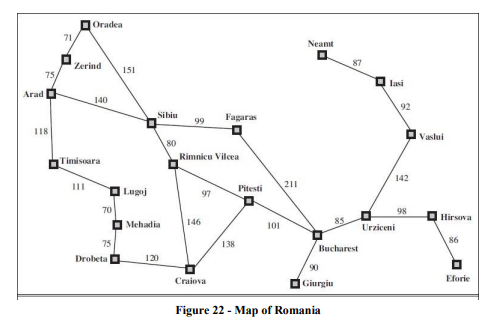

In [7]:
GRAPH = {
    'Oradea' : Node('Oradea',None,['Zerind','Sibiu'],[71,151] ),
    'Zerind' : Node('Zerind',None,['Arad', 'Oradea'],[75,71 ]),
    'Arad' : Node('Arad',None,['Zerind','Timisoara','Sibiu'],[75,118,140] ),
    'Sibiu' : Node('Sibiu',None,['Fagaras','Rimnicu Vilcea','Oradea','Arad'],[99,80,151,140] ),
    'Fagaras' : Node('Fagaras',None,['Sibiu','Bucharest'],[99,211] ),
    'Bucharest' : Node('Bucharest',None,['Fagaras','Pitesti','Urziceni','Giurgiu'],[211,101,85,90] ),
    'Pitesti' : Node('Pitesti',None,['Rimnicu Vilcea','Bucharest','Craiova'],[97,101,138] ),
    'Urziceni' : Node('Urziceni',None,['Bucharest','Hirsova','Vaslui'],[85,98,142] ),
    'Hirsova' : Node('Hirsova',None,['Urziceni','Eforie'],[98,86] ),
    'Timisoara':Node('Timisoara',None,['Lugoj','Arad'],[111,118]),
    'Lugoj':Node('Lugoj',None,['Mehadia','Timisoara'],[70,111]),
    'Mehadia':Node('Mehadia',None,['Drobeta','Lugoj'],[75,70]),
    'Rimnicu Vilcea':Node('Rimnicu Vilcea',None,['Sibiu','Pitesti'],[70,111]),
    'Drobeta' : Node('Drobeta',None,['Craiova','Mehadia'],[120,75] ),
    'Craiova' : Node('Craiova',None,['Pitesti','Rimnicu Vilcea'],[138,146] ),
    'Eforie' : Node('Eforie',None,['Hirsova'],[86] ),
    'Vaslui' : Node('Vaslui',None,['Urziceni','Iasi'],[142,92] ),
    'Iasi' : Node('Iasi',None,['Vaslui','Neamt'],[92,87] ),
    'Giurgiu' : Node('Giurgiu',None,[],[]),
    'Neamt' : Node('Neamt',None,[],[] )
    }

INITIAL_STATE = 'Arad' 
GOAL_STATE = 'Neamt'

In [8]:
solution = UniformCostSearch(graph=GRAPH,
                             initialState=INITIAL_STATE,
                             goalState=GOAL_STATE)